# Python으로 shape 파일 데이터 병합

## 패키지 참조

`geopandas` 패키지 설치가 필요하다.

In [18]:
import geopandas as gpd
from pandas import read_excel, merge
from matplotlib import pyplot as plt

## 데이터 가져오기

### shape 파일 불러오기

In [2]:
sig = gpd.read_file('sig_EPSG5179.shp')
sig

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((1027779.614 2032000.017, 1027951.841..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463..."
247,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917..."


In [19]:
sig.isna().sum()

SIG_CD        0
SIG_ENG_NM    0
SIG_KOR_NM    0
geometry      0
dtype: int64

### shapge 그래픽 확인

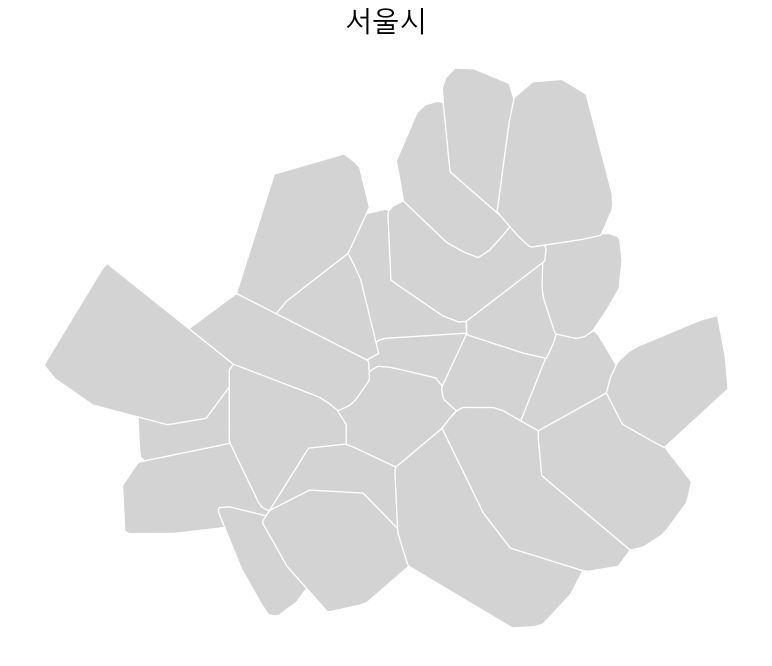

In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14

ax = sig.query('SIG_CD < "20000"').convex_hull.plot(color='lightgray', edgecolor='#ffffff', figsize=(12, 8))
ax.set_title('서울시', fontsize=20)
ax.set_axis_off()
plt.show()
plt.close()

## 엑셀 데이터 가져오기

In [17]:
교통사고df = read_excel('서울_시군구_교통사고(2022).xlsx')
교통사고df

,시도,시군구,사고건수(건),사망자수(명),부상자수(명)
0,서울,합계,33698,221,45329
1,서울,종로구,974,3,1351
2,서울,중구,943,2,1212
3,서울,용산구,1014,11,1330
4,서울,성동구,948,8,1222
...,...,...,...,...,...
241,울산,동구,501,2,622
242,울산,북구,802,10,1247
243,울산,울주군,660,11,1005
244,세종,합계,932,17,1330


## 데이터 전처리

In [20]:
병합데이터 = merge(sig, 교통사고df, left_on='SIG_KOR_NM', right_on='시군구', how='left')
병합데이터

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,시도,시군구,사고건수(건),사망자수(명),부상자수(명)
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",서울,종로구,974.0,3.0,1351.0
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",서울,중구,943.0,2.0,1212.0
2,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",부산,중구,357.0,3.0,479.0
3,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",대구,중구,720.0,3.0,1025.0
4,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",인천,중구,462.0,11.0,667.0
...,...,...,...,...,...,...,...,...,...
353,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463...",강원,양구군,79.0,5.0,107.0
354,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076...",강원,인제군,89.0,5.0,151.0
355,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",강원,고성군,146.0,2.0,245.0
356,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",경남,고성군,208.0,13.0,265.0


In [23]:
병합데이터

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,시도,시군구,사고건수(건),사망자수(명),부상자수(명)
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",서울,종로구,974.0,3.0,1351.0
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",서울,중구,943.0,2.0,1212.0
2,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",부산,중구,357.0,3.0,479.0
3,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",대구,중구,720.0,3.0,1025.0
4,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",인천,중구,462.0,11.0,667.0
...,...,...,...,...,...,...,...,...,...
353,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463...",강원,양구군,79.0,5.0,107.0
354,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076...",강원,인제군,89.0,5.0,151.0
355,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",강원,고성군,146.0,2.0,245.0
356,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",경남,고성군,208.0,13.0,265.0


In [27]:
병합데이터.rename(columns={'시도':'SIDO', '시군구': 'SIGUNGU', '사고건수(건)': 'ACC', '사망자수(명)': 'DEATH', '부상자수(명)': 'INJURY'}, inplace=True)

In [28]:
병합데이터

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,SIDO,SIGUNGU,ACC,DEATH,INJURY
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",서울,종로구,974.0,3.0,1351.0
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",서울,중구,943.0,2.0,1212.0
2,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",부산,중구,357.0,3.0,479.0
3,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",대구,중구,720.0,3.0,1025.0
4,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",인천,중구,462.0,11.0,667.0
...,...,...,...,...,...,...,...,...,...
353,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463...",강원,양구군,79.0,5.0,107.0
354,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076...",강원,인제군,89.0,5.0,151.0
355,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",강원,고성군,146.0,2.0,245.0
356,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",경남,고성군,208.0,13.0,265.0


In [30]:
병합데이터.to_file('병합데이터.shp', driver='ESRI Shapefile', encoding="utf-8")